<a href="https://colab.research.google.com/github/Emman-sys/MovieAI/blob/main/EmmanuellePranada.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Load the dataset

In [2]:
import pandas as pd

df = pd.read_csv('/content/drive/MyDrive/movie_statistic_dataset.csv')
df['production_date'] = pd.to_datetime(df['production_date'], errors='coerce')
df['production_year'] = df['production_date'].dt.year

## Data exploration

In [3]:
display(df.head())
print(df.shape)
df.info()

,movie_title,production_date,genres,runtime_minutes,director_name,director_professions,director_birthYear,director_deathYear,movie_averageRating,movie_numerOfVotes,approval_Index,Production budget $,Domestic gross $,Worldwide gross $,production_year
0,Mambo Italiano,2003-06-06,"Comedy,Drama,Romance",88,Émile Gaudreault,"writer,director,producer",1964,alive,6.7,6765,4.215780,5500000,9282750,12399772,2003.0
1,Arctic Dogs,2019-01-11,"Adventure,Animation,Comedy",92,Aaron Woodley,"director,writer,editor",1971,alive,4.8,2056,2.562262,50000000,5801249,11285154,2019.0
2,Timbuktu,2014-11-12,"Drama,War",96,Abderrahmane Sissako,"director,writer,producer",1961,alive,7.1,17684,4.977296,2500000,1076075,6815821,2014.0
3,The Funeral,1996-01-11,"Crime,Drama",99,Abel Ferrara,"director,writer,actor",1951,alive,6.6,8987,4.288808,12500000,1212799,1412799,1996.0
4,"Definitely, Maybe",NaT,"Comedy,Drama,Romance",112,Adam Brooks,"writer,producer,director",1956,alive,7.1,167865,6.152919,7000000,32241649,55617866,NaN


(4054, 15)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4054 entries, 0 to 4053
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   movie_title           4054 non-null   object        
 1   production_date       1509 non-null   datetime64[ns]
 2   genres                4054 non-null   object        
 3   runtime_minutes       4054 non-null   int64         
 4   director_name         4054 non-null   object        
 5   director_professions  4054 non-null   object        
 6   director_birthYear    4054 non-null   object        
 7   director_deathYear    4054 non-null   object        
 8   movie_averageRating   4054 non-null   float64       
 9   movie_numerOfVotes    4054 non-null   int64         
 10  approval_Index        4054 non-null   float64       
 11  Production budget $   4054 non-null   int64         
 12  Domestic gross $      4054 non-null   int64         
 13  Worldwi

## Handle missing data

In [4]:
print(df.isnull().sum())

from sklearn.impute import SimpleImputer
import numpy as np

# Impute missing numerical values with the mean
numerical_cols_with_nan = df.select_dtypes(include=np.number).columns[df.select_dtypes(include=np.number).isnull().any()]
imputer = SimpleImputer(strategy='mean')
df[numerical_cols_with_nan] = imputer.fit_transform(df[numerical_cols_with_nan])

print("\nMissing values handled by imputation.")
print(df.isnull().sum())

movie_title                0
production_date         2545
genres                     0
runtime_minutes            0
director_name              0
director_professions       0
director_birthYear         0
director_deathYear         0
movie_averageRating        0
movie_numerOfVotes         0
approval_Index             0
Production budget $        0
Domestic gross $           0
Worldwide gross $          0
production_year         2545
dtype: int64

Missing values handled by imputation.
movie_title                0
production_date         2545
genres                     0
runtime_minutes            0
director_name              0
director_professions       0
director_birthYear         0
director_deathYear         0
movie_averageRating        0
movie_numerOfVotes         0
approval_Index             0
Production budget $        0
Domestic gross $           0
Worldwide gross $          0
production_year            0
dtype: int64


## Preprocess Genre Data

In [5]:
df['genres_list'] = df['genres'].str.split(',')
all_genres = sorted(list(set([genre for genres_list in df['genres_list'] for genre in genres_list])))
genre_df = pd.DataFrame({genre: df['genres_list'].apply(lambda x: 1 if genre in x else 0) for genre in all_genres})
genre_counts = genre_df.sum().sort_values(ascending=False)
display(genre_counts)

,0
Drama,2126
Comedy,1473
Action,1147
Adventure,825
Crime,747
Romance,696
Thriller,640
Horror,430
Mystery,393
Sci-Fi,357


## Preprocess Director Data

In [6]:
# Calculate director counts
director_counts = df['director_name'].value_counts()
df['director_count'] = df['director_name'].map(director_counts)

# Filter out rows where director_name is '-'
df = df[df['director_name'] != '-']

# Now drop the columns
columns_to_drop_initial = ['movie_title', 'director_name', 'director_professions', 'director_birthYear', 'director_deathYear', 'production_date']
df.drop(columns=columns_to_drop_initial, axis=1, inplace=True, errors='ignore')

display(df[['director_count']].head())

,director_count
0,1
1,1
2,1
3,1
4,1


##Visualize Director

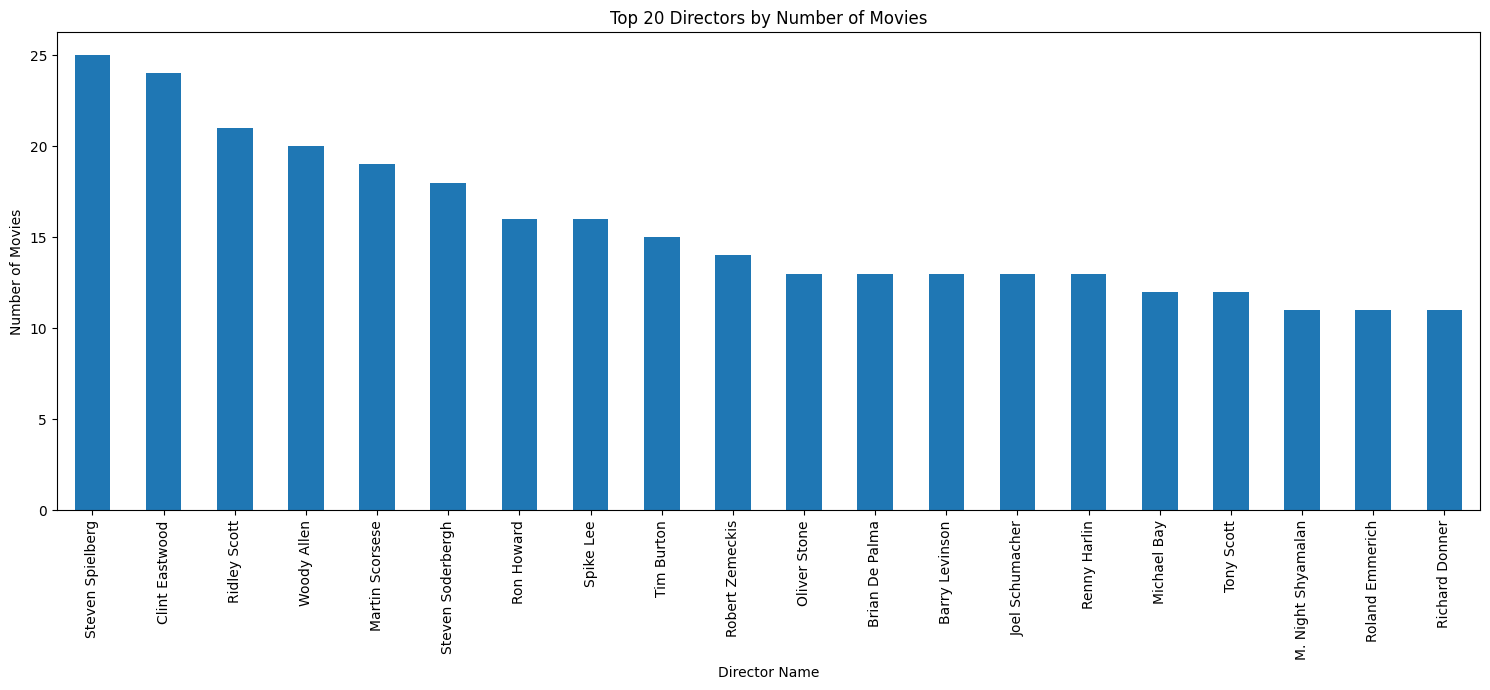

In [7]:
import matplotlib.pyplot as plt

top_n = 20
plt.figure(figsize=(15, 7))
director_counts.head(top_n).plot(kind='bar')
plt.title(f'Top {top_n} Directors by Number of Movies')
plt.xlabel('Director Name')
plt.ylabel('Number of Movies')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

## Visualize genres

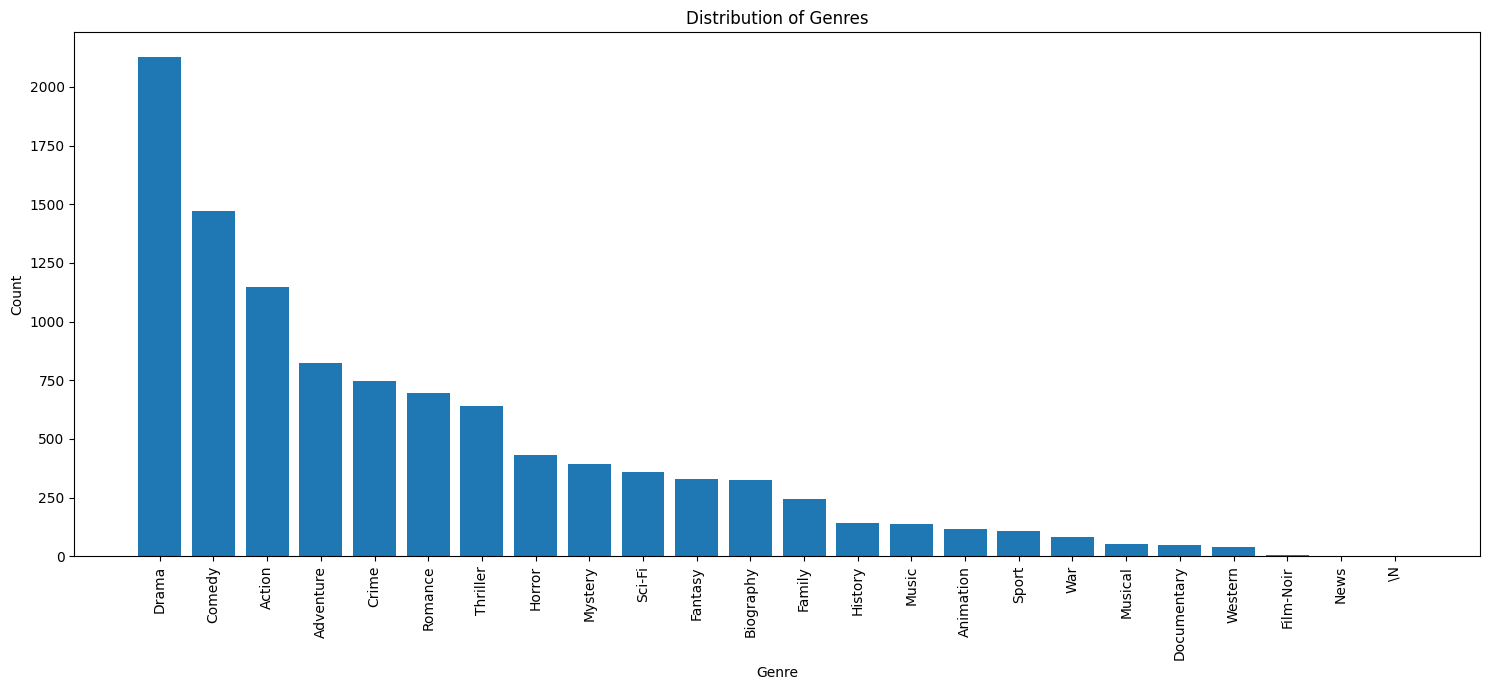

In [8]:
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 7))
plt.bar(genre_counts.index, genre_counts.values)
plt.title('Distribution of Genres')
plt.xlabel('Genre')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

## Correlation heatmaps

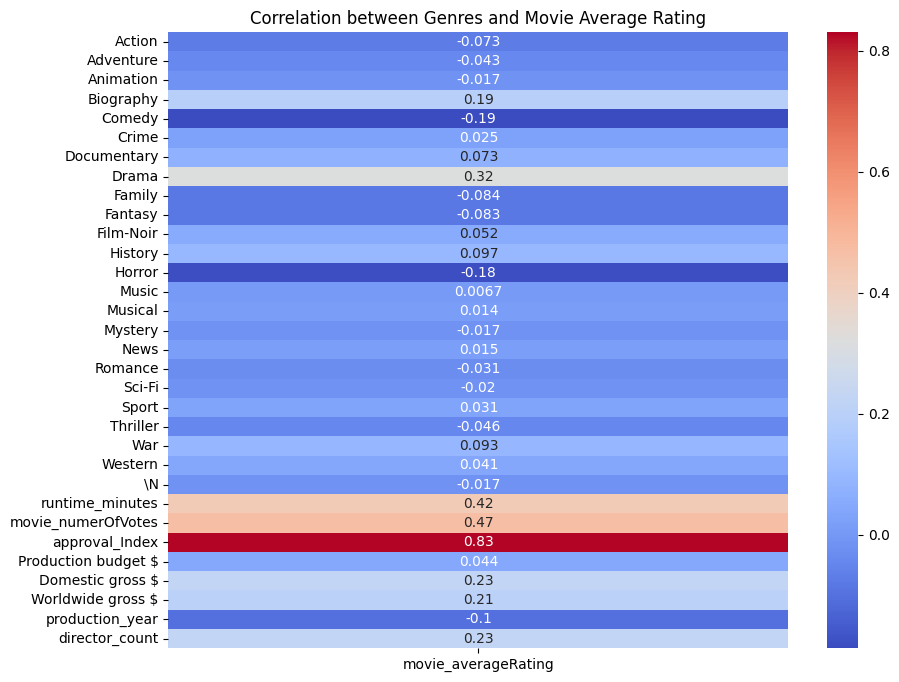

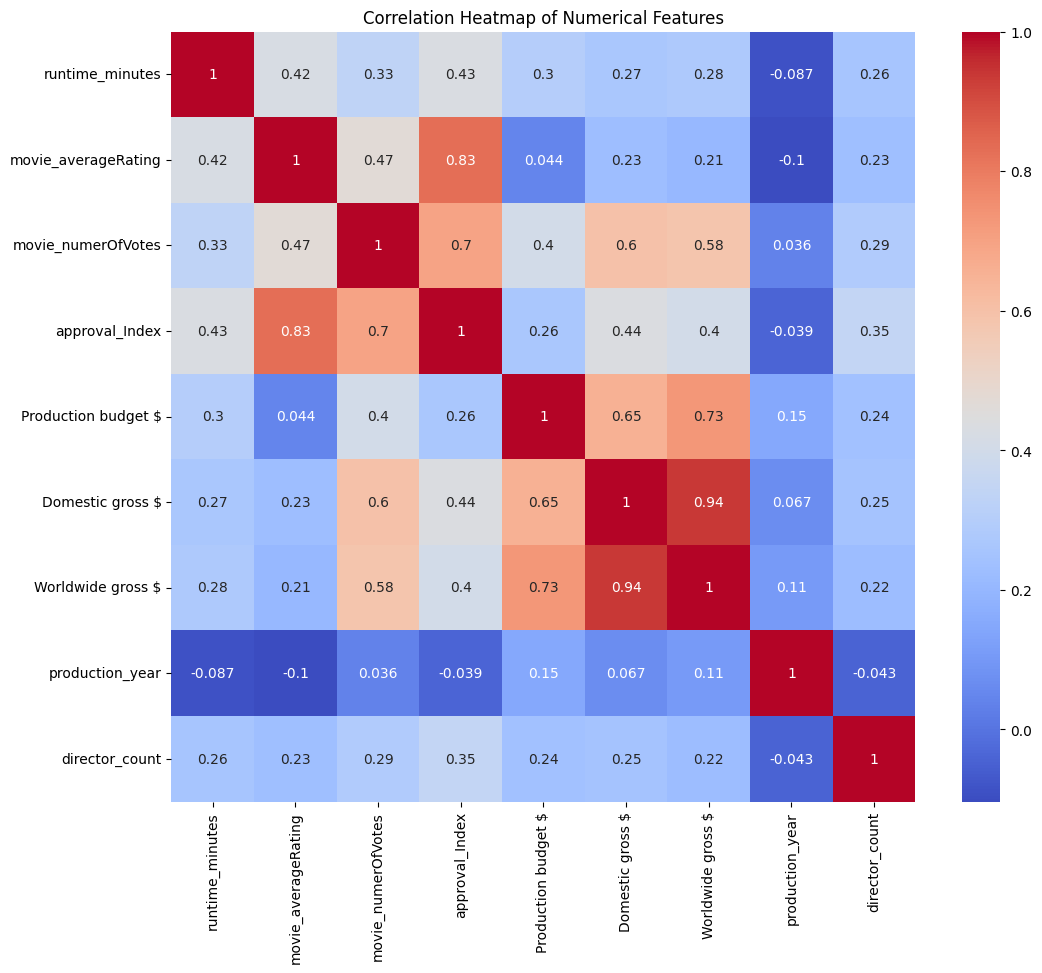

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns
numerical_df = df[numerical_cols]
combined_df = pd.concat([genre_df, numerical_df], axis=1)

# Correlation heatmap of genres to rating
genre_rating_corr = combined_df.corr()[['movie_averageRating']].drop('movie_averageRating')
plt.figure(figsize=(10, 8))
sns.heatmap(genre_rating_corr, annot=True, cmap='coolwarm')
plt.title('Correlation between Genres and Movie Average Rating')
plt.show()

# Correlation heatmap of numerical features
plt.figure(figsize=(12, 10))
sns.heatmap(numerical_df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap of Numerical Features')
plt.show()

## Select relevant features

In [10]:
columns_to_drop = ['movie_title', 'director_name', 'director_professions', 'director_birthYear', 'director_deathYear', 'production_date']
df.drop(columns=columns_to_drop, axis=1, inplace=True, errors='ignore')


import seaborn as sns
import matplotlib.pyplot as plt

numerical_cols = df.select_dtypes(include=['float64', 'int64', 'int32']).columns
numerical_df = df[numerical_cols]
combined_df = pd.concat([genre_df, numerical_df], axis=1)
combined_df['director_count'] = df['director_count']

# Feature selection for training
y = (combined_df['movie_averageRating'] > 6).astype(int)
# Include 'production_year' and drop 'production_date'
X = combined_df.drop(columns=['production_date', 'genres', 'genres_list', 'movie_averageRating', 'approval_Index', 'movie_numerOfVotes', 'Domestic gross $'], errors='ignore')
X['production_year'] = df['production_year'] # Add the new feature
display(df.head())

,genres,runtime_minutes,movie_averageRating,movie_numerOfVotes,approval_Index,Production budget $,Domestic gross $,Worldwide gross $,production_year,genres_list,director_count
0,"Comedy,Drama,Romance",88,6.7,6765,4.215780,5500000,9282750,12399772,2003.000000,"[Comedy, Drama, Romance]",1
1,"Adventure,Animation,Comedy",92,4.8,2056,2.562262,50000000,5801249,11285154,2019.000000,"[Adventure, Animation, Comedy]",1
2,"Drama,War",96,7.1,17684,4.977296,2500000,1076075,6815821,2014.000000,"[Drama, War]",1
3,"Crime,Drama",99,6.6,8987,4.288808,12500000,1212799,1412799,1996.000000,"[Crime, Drama]",1
4,"Comedy,Drama,Romance",112,7.1,167865,6.152919,7000000,32241649,55617866,2003.927767,"[Comedy, Drama, Romance]",1


## Split data

In [11]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Training set shape: {X_train.shape}")
print(f"Testing set shape: {X_test.shape}")

Training set shape: (3243, 29)
Testing set shape: (811, 29)


## Handle remaining missing values

In [12]:
from sklearn.impute import SimpleImputer

# Impute missing values with the mean
imputer = SimpleImputer(strategy='mean')
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)

# Now scale the imputed data
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_imputed)
X_test_scaled = scaler.transform(X_test_imputed)

print("Missing values imputed and features scaled.")

Missing values imputed and features scaled.


## Feature scaling

In [13]:
print("Features used for training:")
print(X.columns.tolist())

Features used for training:
['Action', 'Adventure', 'Animation', 'Biography', 'Comedy', 'Crime', 'Documentary', 'Drama', 'Family', 'Fantasy', 'Film-Noir', 'History', 'Horror', 'Music', 'Musical', 'Mystery', 'News', 'Romance', 'Sci-Fi', 'Sport', 'Thriller', 'War', 'Western', '\\N', 'runtime_minutes', 'Production budget $', 'Worldwide gross $', 'production_year', 'director_count']


In [14]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("Training features scaled.")
print("Testing features scaled.")

Training features scaled.
Testing features scaled.


## Build models

In [16]:
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

# Hyperparameter tuning for SVM
svm_param_grid = {'C': [0.1, 1, 10, 100], 'gamma': [1, 0.1, 0.01, 0.001], 'kernel': ['rbf']}
svm_grid = GridSearchCV(SVC(), svm_param_grid, refit=True, verbose=0)
svm_grid.fit(X_train_scaled, y_train)
svm_model = svm_grid.best_estimator_

# Hyperparameter tuning for Decision Tree
dt_param_grid = {'max_depth': [None, 10, 20, 30], 'min_samples_split': [2, 5, 10]}
dt_grid = GridSearchCV(DecisionTreeClassifier(random_state=42), dt_param_grid, refit=True, verbose=0)
dt_grid.fit(X_train_scaled, y_train)
dt_model = dt_grid.best_estimator_

print(f"Best parameters for SVM: {svm_grid.best_params_}")
print(f"Best parameters for Decision Tree: {dt_grid.best_params_}")
print("SVM model trained with best hyperparameters.")
print("Decision Tree model trained with best hyperparameters.")


SVM model trained with best hyperparameters.
Decision Tree model trained with best hyperparameters.
Best parameters for SVM: {'C': 100, 'gamma': 0.001, 'kernel': 'rbf'}
Best parameters for Decision Tree: {'max_depth': 10, 'min_samples_split': 5}


## Evaluate models

In [17]:
import pandas as pd
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import cross_val_score

# Calculate evaluation metrics for SVM
svm_pred = svm_model.predict(X_test_scaled)
svm_accuracy = accuracy_score(y_test, svm_pred)
svm_precision = precision_score(y_test, svm_pred)
svm_recall = recall_score(y_test, svm_pred)
svm_f1 = f1_score(y_test, svm_pred)
svm_cv_scores = cross_val_score(svm_model, X_train_scaled, y_train, cv=5) # Using 5-fold cross-validation

# Calculate evaluation metrics for Decision Tree
dt_pred = dt_model.predict(X_test_scaled)
dt_accuracy = accuracy_score(y_test, dt_pred)
dt_precision = precision_score(y_test, dt_pred)
dt_recall = recall_score(y_test, dt_pred)
dt_f1 = f1_score(y_test, dt_pred)
dt_cv_scores = cross_val_score(dt_model, X_train_scaled, y_train, cv=5) # Using 5-fold cross-validation


evaluation_summary = pd.DataFrame({
    'Model': ['SVM', 'Decision Tree'],
    'Test Accuracy': [svm_accuracy, dt_accuracy],
    'Test Precision': [svm_precision, dt_precision],
    'Test Recall': [svm_recall, dt_recall],
    'Test F1-score': [svm_f1, dt_f1],
    'Mean CV Accuracy': [svm_cv_scores.mean(), dt_cv_scores.mean()],
    'Std Dev CV Accuracy': [svm_cv_scores.std(), dt_cv_scores.std()]
})

display(evaluation_summary)

,Model,Test Accuracy,Test Precision,Test Recall,Test F1-score,Mean CV Accuracy,Std Dev CV Accuracy
0,SVM,0.771887,0.795645,0.882900,0.837004,0.764104,0.009179
1,Decision Tree,0.726264,0.795880,0.789963,0.792910,0.713232,0.013041


## Download models

In [21]:
import joblib

joblib.dump(svm_model, 'svm_model.pkl')
joblib.dump(dt_model, 'dt_model.pkl')

print("Models saved successfully.")

Models saved successfully.


## Test loaded models

In [22]:
import joblib
from sklearn.metrics import accuracy_score

loaded_svm_model = joblib.load('svm_model.pkl')
loaded_dt_model = joblib.load('dt_model.pkl')

svm_pred_loaded = loaded_svm_model.predict(X_test_scaled)
dt_pred_loaded = loaded_dt_model.predict(X_test_scaled)

svm_accuracy_loaded = accuracy_score(y_test, svm_pred_loaded)
dt_accuracy_loaded = accuracy_score(y_test, dt_pred_loaded)

print(f"Loaded SVM Model Test Accuracy: {svm_accuracy_loaded:.4f}")
print(f"Loaded Decision Tree Model Test Accuracy: {dt_accuracy_loaded:.4f}")

Loaded SVM Model Test Accuracy: 0.7719
Loaded Decision Tree Model Test Accuracy: 0.7263
